In [5]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pandas

In [147]:
import pymysql
import folium

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings

In [12]:
connection=pymysql.connect(host="127.0.0.1",user="root",password="Ganesh@950513",database="minicap")

In [13]:
query='select * from crime_data'

In [14]:
df=pd.read_sql(query,connection)

C:\Users\HP\AppData\Local\Temp\ipykernel_1300\3823902772.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,connection)


In [15]:
warnings.filterwarnings("ignore")
df

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,200106614,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,33,M,SIDEWALK,IC,2400 ELLENDALE PL,34.05,-118.26
495,200106615,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,39TH PL,34.05,-118.26
496,200106616,02-07-2020,02-07-2020,Central,624,BATTERY - SIMPLE ASSAULT,35,M,OTHER STORE,IC,2500 W VERNON AV,34.05,-118.25
497,200106617,02-07-2020,01-10-2020,Central,510,VEHICLE - STOLEN,0,F,PARKING LOT,IC,700 EXPOSITION BL,34.05,-118.25


In [16]:
df.describe()

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


In [17]:
# identify the distinct codes and their descriptions

In [18]:
query1='select distinct Crm_Cd,Crm_Cd_Desc from crime_data'

In [19]:
crime_code=pd.read_sql(query1,connection)

In [20]:
crime_code

,Crm_Cd,Crm_Cd_Desc
0,624,BATTERY - SIMPLE ASSAULT
1,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER)
2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA..."
3,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER)
4,946,OTHER MISCELLANEOUS CRIME
5,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
6,330,BURGLARY FROM VEHICLE
7,930,CRIMINAL THREATS - NO WEAPON DISPLAYED
8,648,ARSON
9,354,THEFT OF IDENTITY


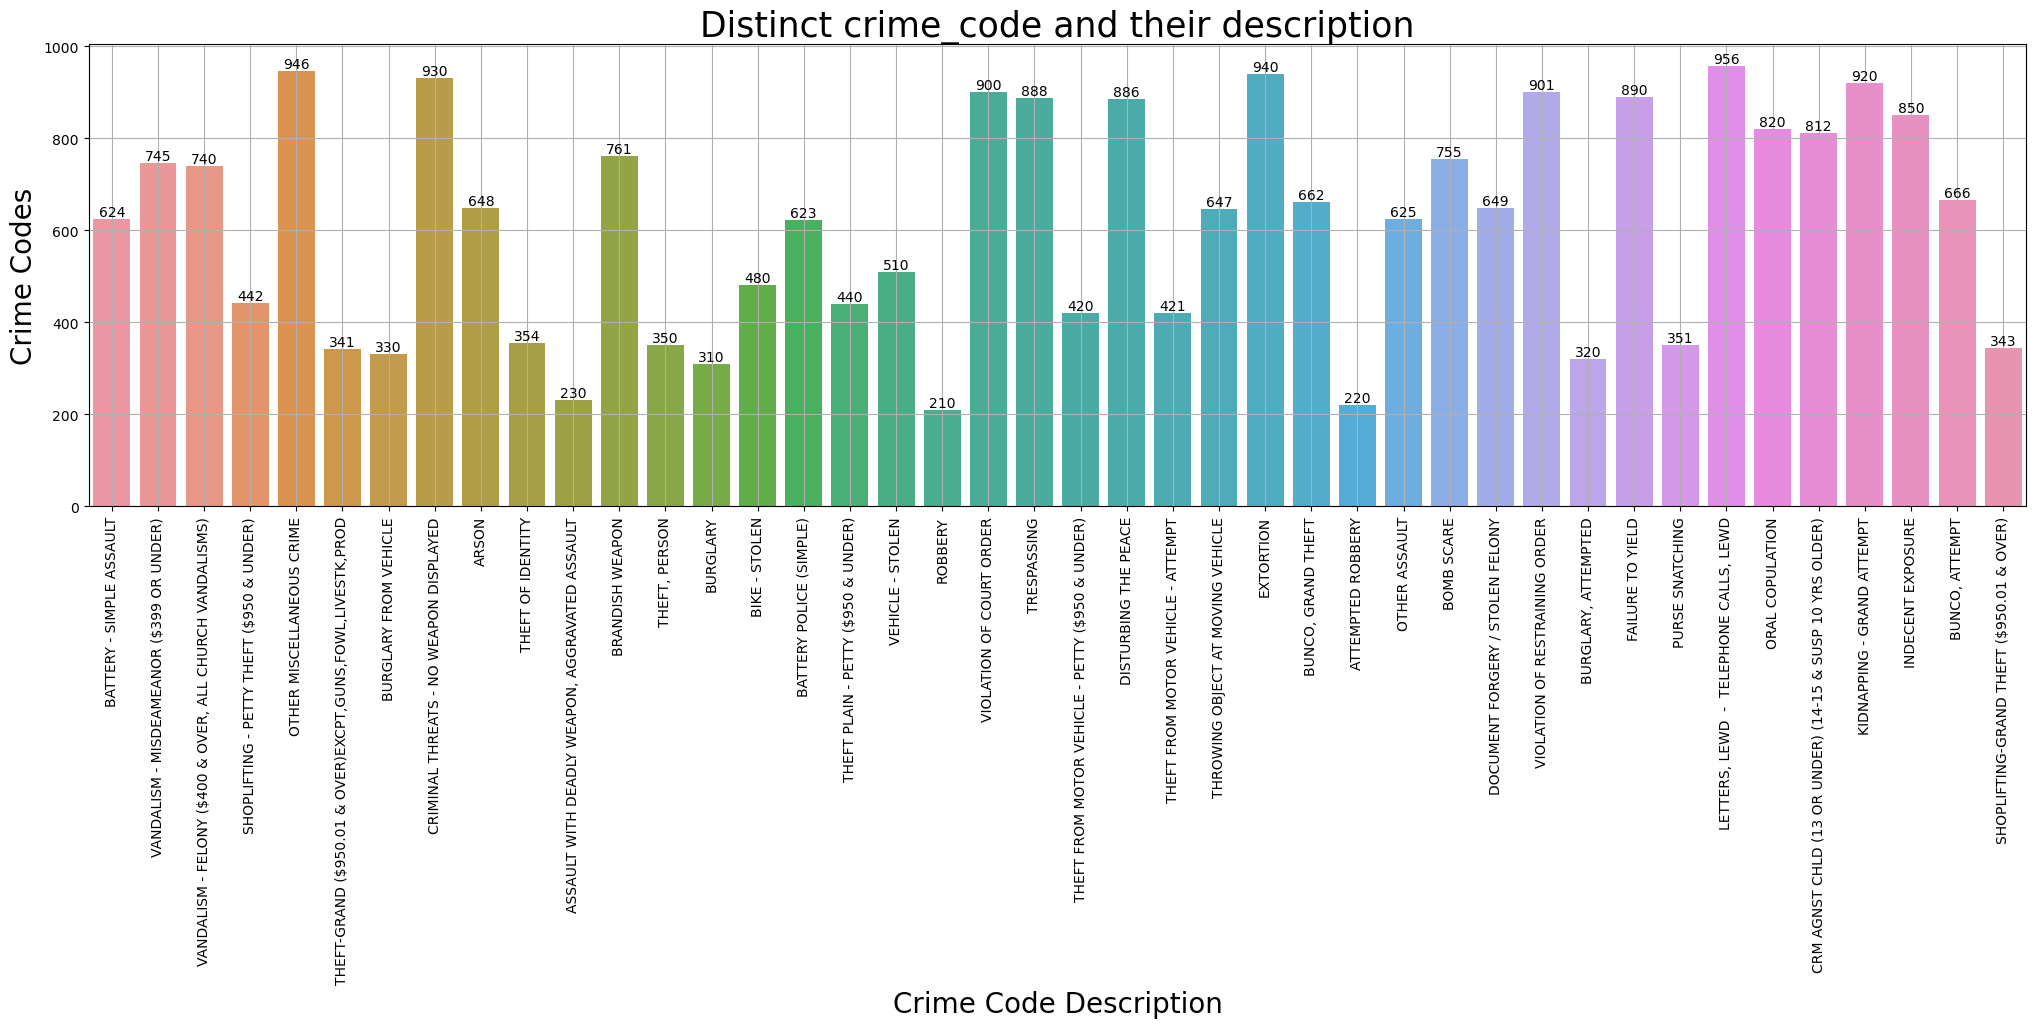

In [27]:
plt.figure(figsize=(25,6))
ax=sns.barplot(crime_code, y='Crm_Cd',x='Crm_Cd_Desc')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distinct crime_code and their description',fontsize='25',loc='center')
plt.xlabel('Crime Code Description',fontsize='20')
plt.xticks(rotation=90)
plt.ylabel('Crime Codes',fontsize='20')
plt.grid()
plt.show()

In [28]:
# The Geo-graphical hotspots for crime reports

In [29]:
query2='select LON,LAT from crime_data group by LON,LAT'
hotspots_loc=pd.read_sql(query2,connection)
hotspots_loc

,LON,LAT
0,-118.30,34.01
1,-118.25,34.05
2,-118.40,34.17
3,-118.45,34.22
4,-118.26,34.05
...,...,...
76,-118.37,34.07
77,-118.24,34.11
78,-118.35,34.08
79,-118.30,34.10


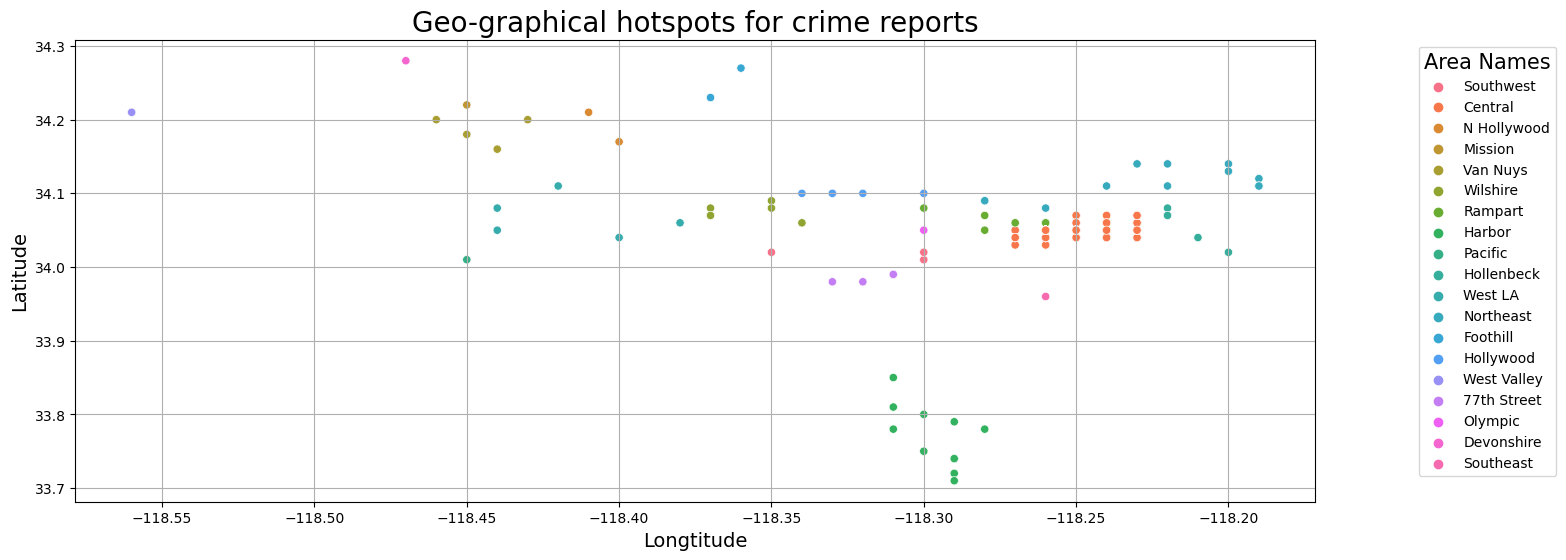

In [106]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='LON',y='LAT',data=df,hue='AREA_NAME')
plt.title('Geo-graphical hotspots for crime reports',fontsize='20')
plt.xlabel('Longtitude',fontsize='14')
plt.ylabel('Latitude',fontsize='14')
plt.legend(bbox_to_anchor=(1.2, 1),loc='upper right',title='Area Names',title_fontsize='15')
plt.grid()
plt.show()

In [31]:
# The distribution of victim ages in crime report

In [32]:
connection=pymysql.connect(host="127.0.0.1",user="root",password="Ganesh@950513",database="minicap")
age='select Vict_Age,count(*) as count_total from crime_data group by Vict_Age order by count_total'
victage=pd.read_sql(age,connection)
victage

,Vict_Age,count_total
0,76,1
1,70,1
2,78,1
3,17,1
4,9,1
...,...,...
61,23,15
62,28,16
63,35,17
64,26,19


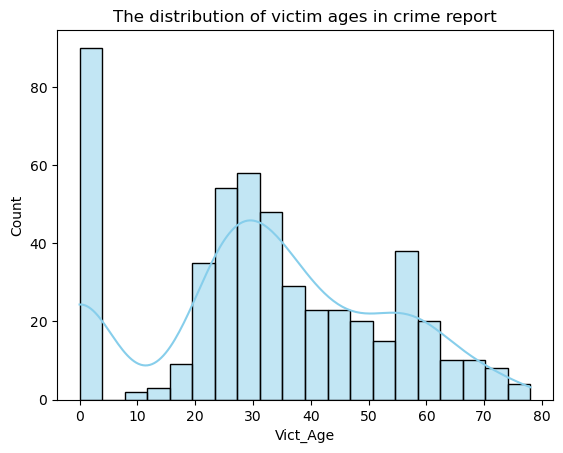

In [102]:
sns.histplot(x=df.Vict_Age,color='skyblue',bins=20,kde=True) 
plt.title('The distribution of victim ages in crime report')
plt.show()

In [34]:
#Differnce in crime rates between males and females 

In [35]:
query3="select Vict_Sex,Crm_Cd,Vict_Age from crime_data where Vict_Sex IN ('M','F')"
gender=pd.read_sql(query3,connection)
gender

,Vict_Sex,Crm_Cd,Vict_Age
0,F,624,36
1,M,624,25
2,F,745,76
3,M,442,23
4,M,341,23
...,...,...,...
428,M,624,33
429,M,624,25
430,M,624,35
431,F,510,0


In [116]:
import plotly.express as px
fig = px.box(gender, x='Vict_Age', y='Crm_Cd', color='Vict_Sex', title='Difference in crime rates between males and females')
fig.update_layout(width=1000, height=500,title_x=0.5)
fig.show()

In [37]:
#most crimes occur based on the Location column

In [38]:
loc='select location,count(*) as loc_count from crime_data group by location order by loc_count desc limit 15'
dt_=pd.read_sql(loc,connection)
dt_

,location,loc_count
0,800 N ALAMEDA ST,14
1,700 W 7TH ST,11
2,300 E 5TH ST,6
3,1100 S FIGUEROA ST,6
4,6TH,6
5,600 S SPRING ST,5
6,100 E 5TH ST,5
7,7TH ST,5
8,500 S SAN PEDRO ST,5
9,800 W OLYMPIC BL,4


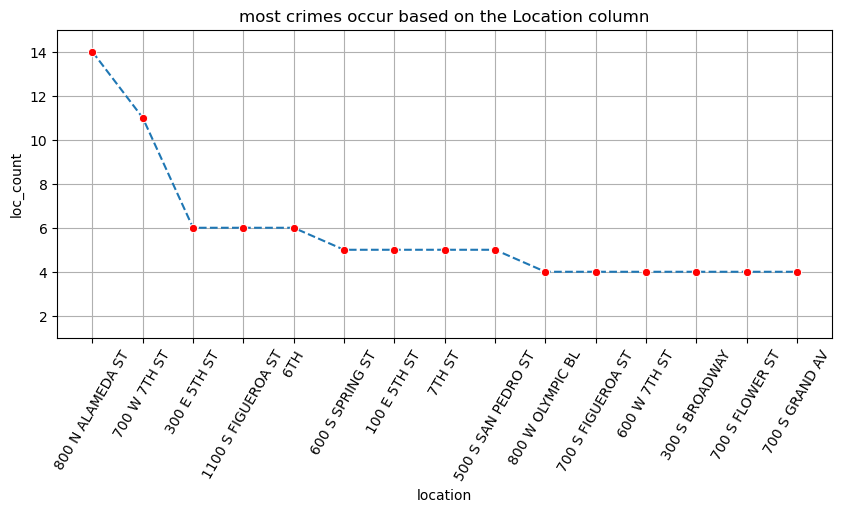

In [146]:
plt.figure(figsize=(10,4))
sns.lineplot(x=dt_['location'],y=dt_['loc_count'],linestyle='--',marker='o',markerfacecolor='red')
plt.title('most crimes occur based on the Location column')
plt.xticks(rotation=60)
plt.ylim(1,15)
plt.grid()
plt.show()

In [40]:
# Distribution of reported crimes based on crime_codes

In [41]:
crime_codes='select Crm_Cd as crime_code,count(*) as count_crime from crime_data group by crime_code order by crime_code'
crimecode=pd.read_sql(crime_codes,connection)
crimecode

,crime_code,count_crime
0,210,12
1,220,4
2,230,24
3,310,16
4,320,2
5,330,82
6,341,26
7,343,1
8,350,9
9,351,2


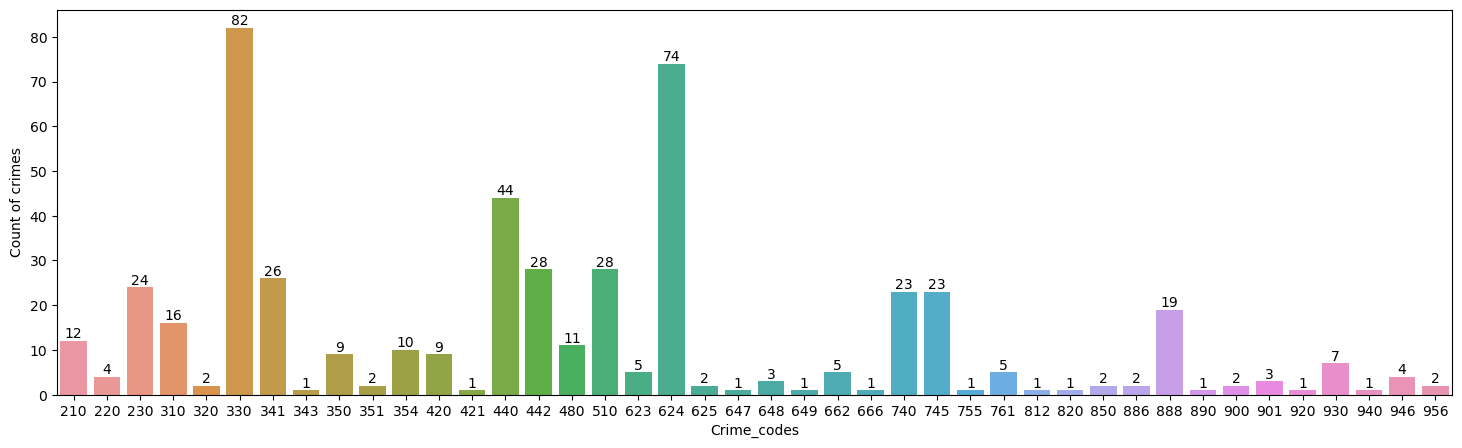

In [42]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='Crm_Cd',data=df)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Crime_codes')
plt.ylabel('Count of crimes')
plt.show()

In [43]:
crime_map = folium.Map(location=[df['LAT'].mean(),df['LON'].mean()])
for index, row in df.iterrows():
    folium.Marker([row['LAT'], row['LON']], popup=row['Crm_Cd_Desc']).add_to(crime_map)
crime_map

In [44]:
query4='select count(status) as count_status,status as crime_status from crime_data group by crime_status'
status_crime=pd.read_sql(query4,connection)
status_crime

,count_status,crime_status
0,24,AO
1,447,IC
2,27,AA
3,1,JO


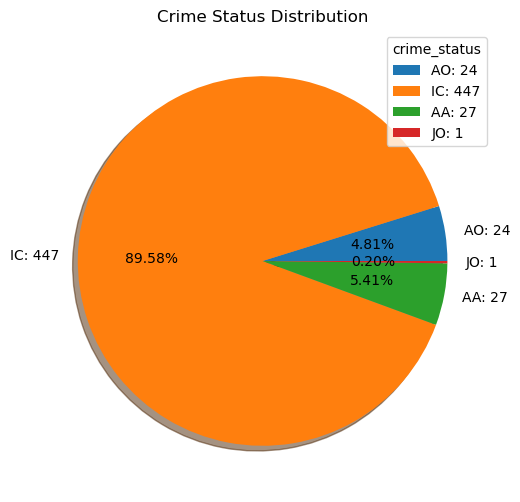

In [45]:
labels = status_crime['crime_status']
values = status_crime['count_status']
label_counts = labels + ': ' + values.astype(str)
plt.figure(figsize=(6, 6))
plt.pie(x=values, labels=label_counts, autopct='%1.2f%%', shadow=True)
plt.title('Crime Status Distribution')
plt.legend(title='crime_status', loc='upper right')
plt.show()


In [158]:
# Creating a dictionary of dictionaries
outer_dict = {
    'dict1': {'key1': 'value1', 'key2': 'value2'},
    'dict2': {'key3': 'value3', 'key4': 'value4'}
}

# Accessing values in the dictionary of dictionaries
print(outer_dict['dict1']['key1'])  # Output: value1
print(outer_dict['dict2']['key3'])  # Output: value3


value1
value3
